# PART 1

In this part, we will use multiple machine learning algorithms to detect survival chances. I have directly implemented the models without manipulating the training and testing dataset. 

In [1]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

print("Scikit version: ", sklearn.__version__)

Scikit version:  0.20.0


**Read training and test data file**

In [2]:
data_manipulation = True

filename = 'train.csv'
data = pd.read_csv(filename)

filename = 'test.csv'
test = pd.read_csv(filename)

print("size of training dataset: ", data.shape)
print("size of test dataset: ", test.shape)

# print first 5 examplesof dataset
print("Dataset: \n", data.head()) 

size of training dataset:  (891, 12)
size of test dataset:  (418, 11)
Dataset: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803 

**Data slicing**

If we want to check with basic dataset without preprocessing, then we need to keep data_manipulation = False. If its value is True, then model will have more number of features and that leads to higher accuracy.

In [3]:
# print (list(data.columns.values))
if data_manipulation == False:
    # dropping the undesired features from training set
    X = data.drop(['Survived','Embarked','Cabin','Ticket','Sex','Name','Age'], axis=1)
    Y = data['Survived']
    
    # dropping the undesired features from test set
    X_test = test.drop(['Embarked','Cabin','Ticket','Sex','Name','Age'], axis=1)
    
    # filling the missing value in Fare feature by calculating mean
    X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)
    
    # split dataset
    X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)  
else:
    # sex mapping from category to numeric
    sex_mapping = {'male': 1, 'female': 0}

    data['Sex'] = data['Sex'].map(sex_mapping)
    test['Sex'] = test['Sex'].map(sex_mapping)
    
    # checking the unique values in Embarked and Age feature
    print("Unique values in Embarked: ", data.Embarked.unique())
    print("Unique values in Embarked: ", test.Embarked.unique())

    print("Unique values in Age: ", data.Age.unique())
    print("Unique values in Age: ", test.Age.unique())
    
    # filling the missing value in Age feature by calculating mean
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    test['Age'].fillna(test['Age'].mean(), inplace=True)
    
    # filling the missing value in Embarked feature by calculating most frequent type
    data = data.fillna(data['Embarked'].value_counts().index[0])
    
    # embarked mapping from category to numeric
    embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
    
    data['Embarked'] = data['Embarked'].map(embarked_mapping)
    test['Embarked'] = test['Embarked'].map(embarked_mapping)
    
    # dropping the undesired features from training set
    X = data.drop(['Survived','Cabin','Ticket','Name'], axis=1)
    Y = data['Survived']

    # dropping the undesired features from test set
    X_test = test.drop(['Cabin','Ticket','Name'], axis=1)
    
    # filling the missing value in Fare feature by calculating mean
    X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

    # split dataset
    X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)

Unique values in Embarked:  ['S' 'C' 'Q' nan]
Unique values in Embarked:  ['Q' 'S' 'C']
Unique values in Age:  [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique values in Age:  [34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   24.   35.   45.   55.    9.   48.   50.   22.5  41.   33.
 18.5  25.   39.   60.   36.   20.   28.   10.   17.   32.   13.   31.
 29.   28.5  32.5   6.   67.   49.    2.   76.   43.   16.    1.   12.
 42.   53.   26.5  40.   61.   60.5   7.   15.   54. 

# PART 2

# Implementation of ML algorithms

**1. Decision Tree Classifier**

In [4]:
training_accuracy = []
validation_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf = 2, random_state=0)
    tree.fit(X_train, Y_train)
    training_accuracy.append(tree.score(X_train, Y_train))
    validation_accuracy.append(tree.score(X_cv, Y_cv))

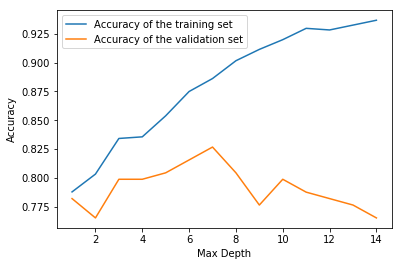

In [5]:
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,validation_accuracy, label='Accuracy of the validation set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [6]:
training_accuracy = np.array(training_accuracy)
validation_accuracy = np.array(validation_accuracy)
difference = 1*(abs(training_accuracy-validation_accuracy) < 1e-2)
temp = max(validation_accuracy*difference)
temp1 = validation_accuracy*difference
index = list(temp1.tolist()).index(temp)

tree_acc = 100*validation_accuracy[index]

print("Accuracy of the test set for depth at {}: {:.3f} %" .format(index+1, tree_acc))

Accuracy of the test set for depth at 1: 78.212 %


**2. Support Vector Machine (Gaussian Kernel)**

In [7]:
svc = SVC()
svc.fit(X_train, Y_train) 

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Determine prediction**

In [8]:
prediction = svc.predict(X_cv)
print("\nAccuracy: ", round(100*accuracy_score(Y_cv,prediction),2))
print("\nOr we can use score() to find accuracy!")
svm_acc = round(100*svc.score(X_cv,Y_cv),2)
print("\nAccuracy: ", svm_acc)


Accuracy:  59.22

Or we can use score() to find accuracy!

Accuracy:  59.22


**3. Linear Support vector machine (Linear Kernel)**

In [9]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

**Determine prediction**

In [10]:
lsvm_acc = round(100*linear_svc.score(X_cv,Y_cv),2)
print("\nAccuracy: ", lsvm_acc)


Accuracy:  54.75


**4. K-Nearest Neighbor**

In [11]:
K = 25
neighbors_setting = list(range(1,K+1))

training_accuracy = []
validation_accuracy = []

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    training_accuracy.append(knn.score(X_train, Y_train))
    validation_accuracy.append(knn.score(X_cv, Y_cv))

# reshaping train and test accuracy    
training_accuracy = np.reshape(training_accuracy, (len(training_accuracy), 1))
validation_accuracy = np.reshape(validation_accuracy, (len(validation_accuracy), 1))

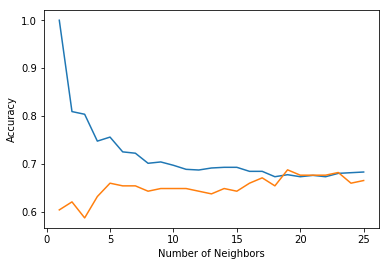

In [12]:
plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, validation_accuracy, label='Accuracy of the validation set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

In [13]:
difference = 1*(abs(training_accuracy-validation_accuracy) < 1e-2)
temp = max(validation_accuracy*difference)
temp1 = validation_accuracy*difference
index = list(temp1.tolist()).index(temp)

knn_acc = 100*validation_accuracy[index,0]

print("Accuracy of the validation set for {}-NN: {:.3f} %" .format(index+1, knn_acc))

Accuracy of the validation set for 23-NN: 68.156 %


**5. Gaussian Naive Bayes**

In [14]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Determine prediction**

In [15]:
gnb_acc = round(100*gaussian.score(X_cv,Y_cv),2)
print("\nAccuracy: ", gnb_acc)


Accuracy:  77.65


**6. Perceptron**

In [16]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

**Determine prediction**

In [17]:
p_acc = round(100*perceptron.score(X_cv,Y_cv),2)
print("\nAccuracy: ", p_acc)


Accuracy:  43.58


**7. Stochastic Gradient Descent**

In [18]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

**Determine prediction**

In [19]:
sgd_acc = round(100*sgd.score(X_cv,Y_cv),2)
print("\nAccuracy: ", sgd_acc)


Accuracy:  61.45


**8. Logistic Regression**

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Determine prediction**

In [21]:
lr_acc = round(100*sgd.score(X_cv,Y_cv),2)
print("\nAccuracy: ", lr_acc)


Accuracy:  61.45


**9. Random Forest**

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Determine prediction**

In [23]:
rf_acc = round(100*random_forest.score(X_cv,Y_cv),2)
print("\nAccuracy: ", rf_acc)


Accuracy:  82.12


In [24]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Support Vector Machine', 'Linear Support Vector Machine', 'K-NN', 'Gaussian Naive Bayes',
              'Perceptron', 'Stochastic Gradient Decent', 'Logistic Regression', 'Random Forest'],
    'Score': [tree_acc, svm_acc, lsvm_acc, knn_acc, gnb_acc, 
              p_acc, sgd_acc, lr_acc, rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Random Forest,82.120000
0,Decision Tree,78.212291
4,Gaussian Naive Bayes,77.650000
3,K-NN,68.156425
6,Stochastic Gradient Decent,61.450000
7,Logistic Regression,61.450000
1,Support Vector Machine,59.220000
2,Linear Support Vector Machine,54.750000
5,Perceptron,43.580000


**Select best algorithm to predict test data** 

In [25]:
models.loc[models['Score'].idxmax()][0]

'Random Forest'

**Prediction on test set** 

In [26]:
best_model = {
    "Decision Tree": tree,
    "Support Vector Machine": svc,
    "Linear Support Vector Machine": linear_svc,
    "K-NN": knn,
    "Gaussian Naive Bayes": gaussian,
    "Perceptron": perceptron,
    "Stochastic Gradient Decent": sgd,  
    "Logistic Regression": log_reg,
    "Random Forest": random_forest
}

print("Classifier: ", best_model[models.loc[models['Score'].idxmax()][0]])

prediction = best_model[models.loc[models['Score'].idxmax()][0]].predict(X_test)
print("Shape of prediction: ", prediction.shape)

Classifier:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Shape of prediction:  (418,)


**Create Submission File**

In [27]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction})
submission.to_csv('submission.csv', index=False)